In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [88]:
captured_data = np.load("CaptureData/capture_07022024_0.npy")
input0_offset=np.argmax(np.abs(captured_data[0])>0)
input1_offset=np.argmax(np.abs(captured_data[1])>0)
output0_offset=np.argmax(np.abs(captured_data[2])>0)
output1_offset=np.argmax(np.abs(captured_data[3])>0)

input0 = captured_data[0]
input1 = captured_data[1]
output0 = captured_data[2]
output1 = captured_data[3]

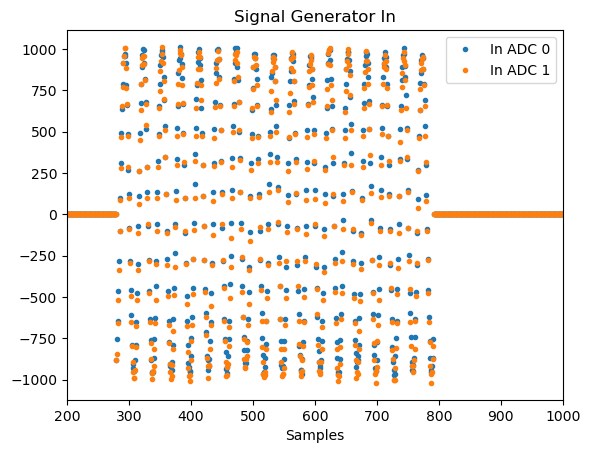

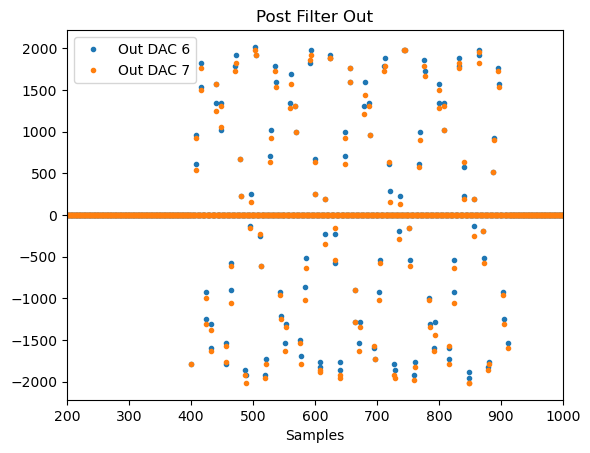

In [21]:
# for index in range(4):
#     plt.plot(np.array(range(len(captured_data[index]))), captured_data[index], linestyle="None", marker=".", label = "%s"%index)
#     # print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
#     plt.xlabel("Samples")
#     plt.legend()
#     plt.xlim(200,1000)
#     plt.show()

plt.title("Signal Generator In")
plt.plot(np.array(range(len(captured_data[0]))), captured_data[0], linestyle="None", 
         marker=".", label = "In ADC 0")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(200,1000)

plt.plot(np.array(range(len(captured_data[1]))), captured_data[1], linestyle="None", 
         marker=".", label = "In ADC 1")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(200,1000)
plt.show()

plt.title("Post Filter Out")
plt.plot(np.array(range(len(captured_data[2]))), captured_data[2], linestyle="None", 
         marker=".", label = "Out DAC 6")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(200,1000)

plt.plot(np.array(range(len(captured_data[3]))), captured_data[3], linestyle="None", 
         marker=".", label = "Out DAC 7")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(200,1000)
plt.show()

In [115]:
output0_decimated = output0.reshape((-1,8))[:,[0,1]].reshape(-1)
input0_decimated = input0.reshape((-1,8))[:,[0,1]].reshape(-1)
output0_samplenum = np.arange(len(output0)).reshape((-1,8))[:,[0,1]].reshape(-1)

input0_offset_decimated=np.argmax(np.abs(input0_decimated)>0)
output0_offset_decimated=np.argmax(np.abs(output0_decimated)>0)

In [116]:
output1_decimated = output1.reshape((-1,8))[:,[0,1]].reshape(-1)
input1_decimated = input1.reshape((-1,8))[:,[0,1]].reshape(-1)
output1_samplenum = np.arange(len(output1)).reshape((-1,8))[:,[0,1]].reshape(-1)

input1_offset_decimated=np.argmax(np.abs(input0_decimated)>0)
output1_offset_decimated=np.argmax(np.abs(output0_decimated)>0)

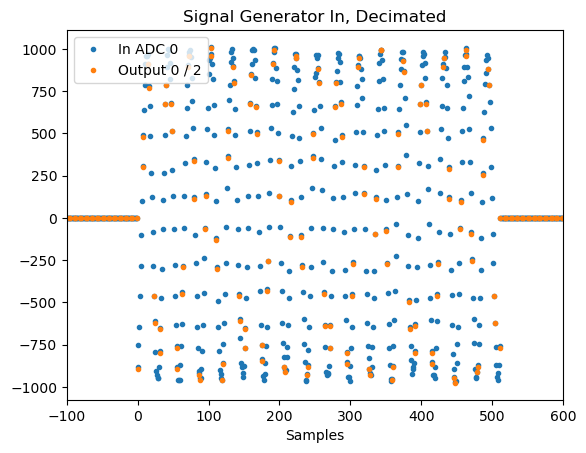

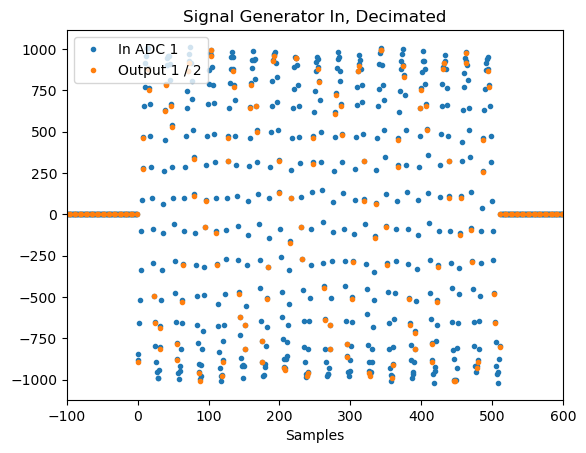

In [123]:
plt.title("Signal Generator In, Decimated")
plt.plot(np.array(range(len(input0)))-input0_offset, input0, linestyle="None", 
         marker=".", label = "In ADC 0")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(200,1000)

plt.plot(output0_samplenum-output0_offset, output0_decimated/2, linestyle="None", 
         marker=".", label = "Output 0 / 2")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-100,600)
plt.show()

plt.title("Signal Generator In, Decimated")
plt.plot(np.array(range(len(input1)))-input1_offset, input1, linestyle="None", 
         marker=".", label = "In ADC 1")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(200,1000)

plt.plot(output1_samplenum-output1_offset, output1_decimated/2, linestyle="None", 
         marker=".", label = "Output 1 / 2")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(-100,600)
plt.show()

In [132]:
phase0 = 1
difference_chan0 = (input0[input0_offset-24-phase0:776+input0_offset-phase0] - 
                    (output0/2)[output0_offset-24-phase0:776+output0_offset-phase0])
difference_chan0_decimated = difference_chan0.reshape((-1,8))[:,[0,1]].reshape(-1)

phase1 = 1
difference_chan1 = (input1[input1_offset-24-phase1:776+input1_offset-phase1] - 
                    (output0/2)[output1_offset-24-phase1:776+output1_offset-phase1])
difference_chan1_decimated = difference_chan1.reshape((-1,8))[:,[0,1]].reshape(-1)

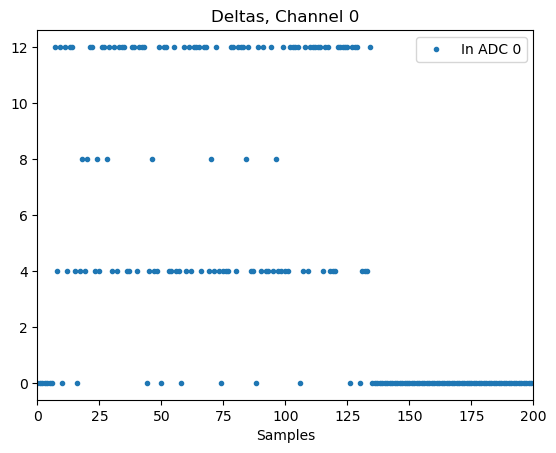

(0.0, 200.0)

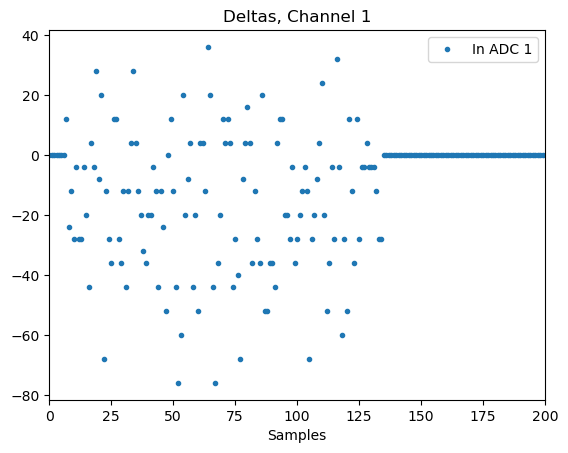

In [133]:
plt.title("Deltas, Channel 0")
plt.plot(np.array(range(len(difference_chan0_decimated))), difference_chan0_decimated, linestyle="None", 
         marker=".", label = "In ADC 0")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(0,200)
plt.show()

plt.title("Deltas, Channel 1")
plt.plot(np.array(range(len(difference_chan1_decimated))), difference_chan1_decimated, linestyle="None", 
         marker=".", label = "In ADC 1")
# print("[%f, %f]"%(np.max(captured_data[index])/(2.0**15),np.min(captured_data[index])/(2.0**15)))
plt.xlabel("Samples")
plt.legend()
plt.xlim(0,200)

In [56]:
# test_data = np.array([1,2,0,0,0,0,0,0,9,10,0,0,0,0,0,0,17,18,0,0,0,0,0,0])

# test0_decimated = test_data.reshape((-1,8))[:,[0,1]].reshape(-1)
# test0_samplenum = np.arange(len(test_data))
# test0_samplenum = test0_samplenum.reshape((-1,8))[:,[0,1]].reshape(-1)
# # test0_samplenum = np.concatenate((np.arange(0,len(test_data),8),
# #                                   np.arange(1,len(test_data),8)))
# print(test0_decimated)
# print()
# print(test0_samplenum)
                                 
                                 

[ 1  2  9 10 17 18]

[ 0  1  8  9 16 17]
